In [1]:
# 1. 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from urllib.parse import urlparse
import torchvision.transforms as T
from kaggleisic.isic_class import ISIC_HDF5_Dataset
from kaggleisic import config

# Plotting style
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# 2. 📂 Load Metadata
# File paths
TRAIN_METADATA_CSV = "new-train-metadata.csv"
TEST_METADATA_CSV = "students-test-metadata.csv"
TRAIN_HDF5 = "train-image.hdf5"
TEST_HDF5 = "test-image.hdf5"

# Load CSV metadata
train_df = pd.read_csv(config.RAW_DATA_DIR / TRAIN_METADATA_CSV)
test_df = pd.read_csv(config.RAW_DATA_DIR / TEST_METADATA_CSV)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
display(train_df.head())
display(test_df.head())

/var/folders/g9/kxkk4qgj7b51026tpb72p1x40000gn/T/ipykernel_86365/4204923379.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(config.RAW_DATA_DIR / TRAIN_METADATA_CSV)


Train shape: (400959, 55)
Test shape: (100, 44)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_8717913,IP_2945977,55.0,female,anterior torso,7.48,TBP tile: close-up,3D: XP,25.711526,17.473305,...,1.804317,3.656785,2.246968,0.207154,70,-34.423306,1274.829834,-44.287476,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC
1,ISIC_1164461,IP_3371534,NaN,NaN,upper extremity,1.13,TBP tile: close-up,3D: XP,23.238357,21.063823,...,0.000000,1.396139,2.064514,0.360000,90,-406.777954,1126.845825,17.436035,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0332355,IP_4513696,45.0,female,posterior torso,1.23,TBP tile: close-up,3D: XP,16.429892,13.567763,...,0.000000,1.016891,1.819939,0.516129,175,-7.310463,1163.263794,110.856689,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC
3,ISIC_0114227,IP_0941046,65.0,male,lower extremity,2.70,TBP tile: close-up,3D: XP,20.286445,12.326959,...,1.532480,6.044860,1.947648,0.185714,175,97.682739,592.137512,-18.877258,University Hospital of Basel,CC-BY-NC
4,ISIC_6031870,IP_7346729,65.0,male,anterior torso,2.74,TBP tile: close-up,3D: XP,27.754000,15.727700,...,1.165052,6.297363,1.514395,0.211180,160,-20.819520,1419.315000,160.189200,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC


/var/folders/g9/kxkk4qgj7b51026tpb72p1x40000gn/T/ipykernel_81210/2843253628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#66c2a5", "#fc8d62"])


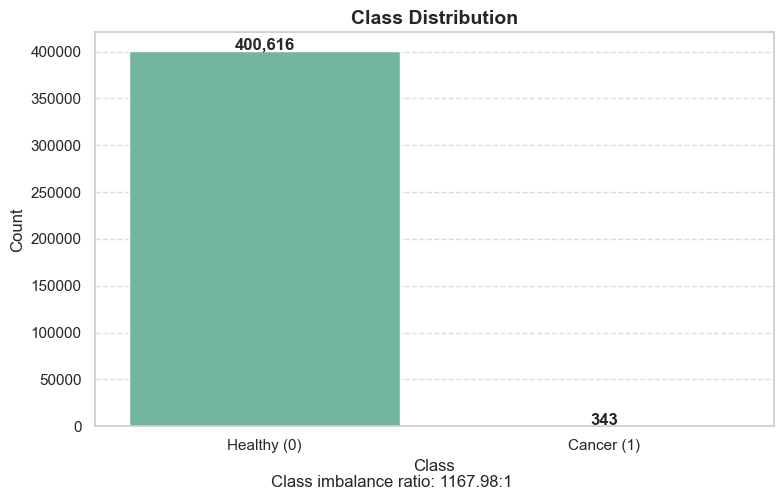

Class Distribution:
Class 0: 400,616 samples (99.91%)
Class 1: 343 samples (0.09%)


In [4]:
# 3. 📊 Class Distribution (Cancer vs. Healthy)
# Define target column
target_column = "target"

# Plot class distribution
plt.figure(figsize=(8, 5))
class_counts = train_df[target_column].value_counts().sort_index()
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#66c2a5", "#fc8d62"])

# Add count labels on top of bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 1500, f"{count:,}", ha="center", fontweight="bold")

# Set labels with class meaning
plt.xticks([0, 1], ["Healthy (0)", "Cancer (1)"])
plt.title("Class Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add information about data balance
ratio = (
    class_counts.values[0] / class_counts.values[1] if len(class_counts) > 1 else "N/A"
)
plt.figtext(0.5, 0.01, f"Class imbalance ratio: {ratio:.2f}:1", ha="center")

plt.tight_layout()
plt.show()

# Print detailed class statistics
print("Class Distribution:")
class_dist = train_df[target_column].value_counts()
class_percentages = 100 * train_df[target_column].value_counts(normalize=True)
for i in range(len(class_dist)):
    print(
        f"Class {i}: {class_dist.iloc[i]:,} samples ({class_percentages.iloc[i]:.2f}%)"
    )

🧩 Columns with missing values:


iddx_5                 400958
mel_mitotic_index      400916
mel_thick_mm           400908
iddx_4                 400440
iddx_3                 399944
iddx_2                 399941
lesion_id              378954
sex                     11513
anatom_site_general      5756
age_approx               2796
dtype: int64

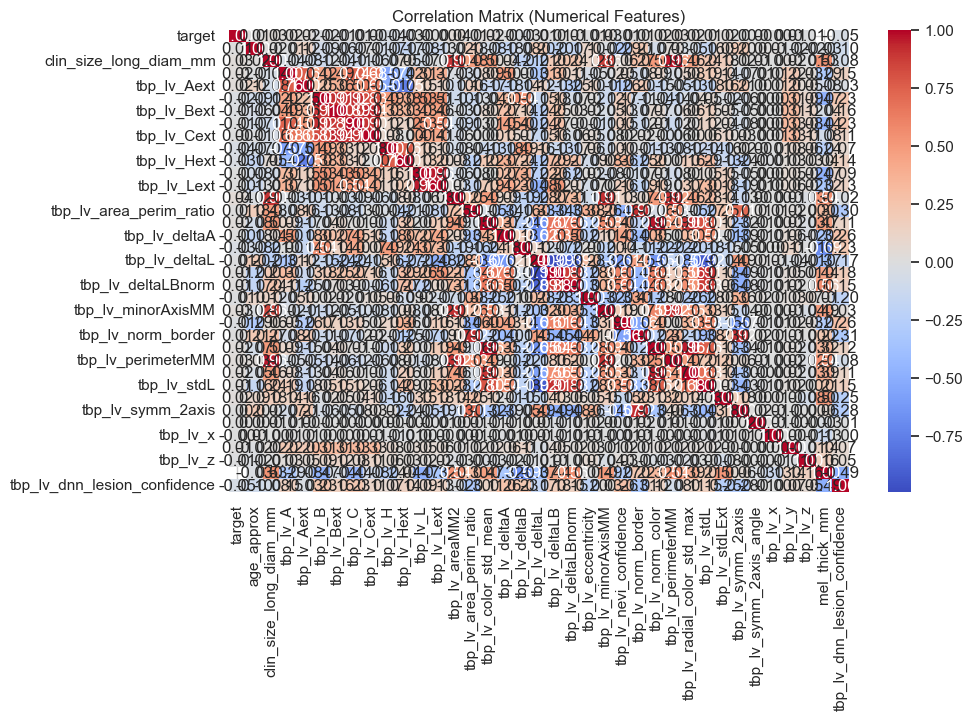

In [5]:
# 4. 🔎 Metadata Missingness & Correlation
# Missing values
missing = train_df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("🧩 Columns with missing values:")
display(missing)

# Correlation heatmap (numerical only)
numerical_cols = train_df.select_dtypes(include=np.number)
if not numerical_cols.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix (Numerical Features)")
    plt.show()
else:
    print("ℹ️ No numerical columns found for correlation.")

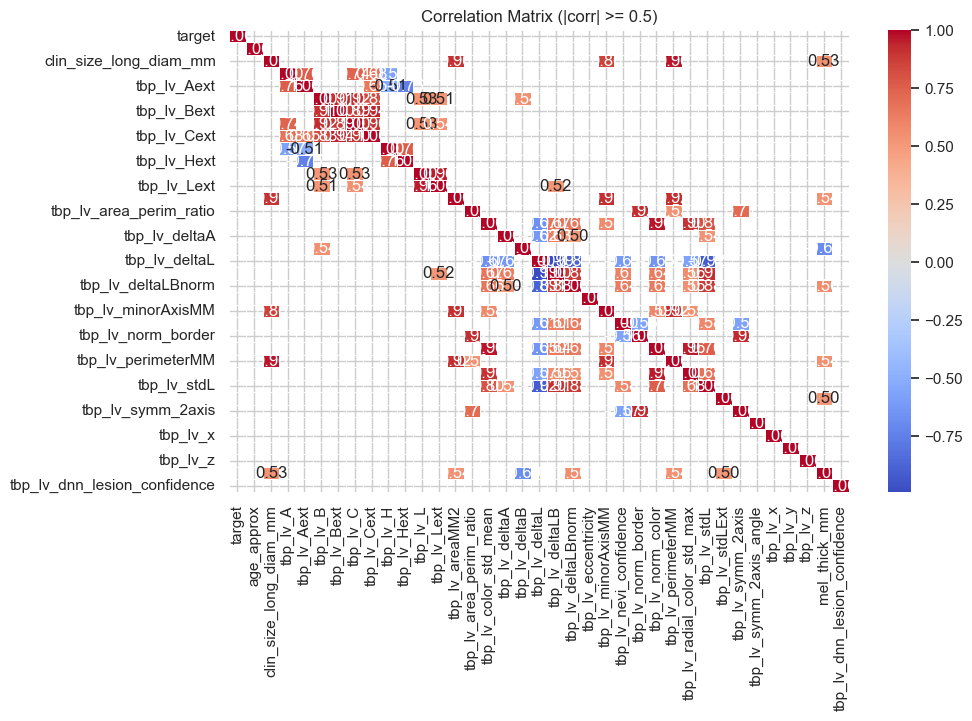

In [6]:
def plot_reduced_correlation_matrix(df, correlation_threshold=0.5):
    # Get numerical columns for correlation analysis
    numerical_cols = df.select_dtypes(include=np.number)

    if not numerical_cols.empty:
        # Calculate the correlation matrix
        corr_matrix = numerical_cols.corr()

        # Mask to keep only correlations above the threshold
        mask = np.abs(corr_matrix) >= correlation_threshold

        # Create a heatmap of the filtered correlation matrix
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            corr_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            mask=~mask,
        )
        plt.title(f"Correlation Matrix (|corr| >= {correlation_threshold})")
        plt.show()
    else:
        print("ℹ️ No numerical columns found for correlation.")


# Plot reduced correlation matrix with a threshold of 0.5 (can be adjusted)
plot_reduced_correlation_matrix(train_df, correlation_threshold=0.5)

In [7]:
# To input path
input_train_image = urlparse(str(config.RAW_DATA_DIR / TRAIN_HDF5)).path

# Simple transform for viewing (no normalization or resizing)
view_transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])

# Create a small dataset just for EDA
eda_dataset = ISIC_HDF5_Dataset(
    df=train_df,  # just a few samples for visualization
    hdf5_path=input_train_image,
    transform=view_transform,
    is_labelled=True,
)

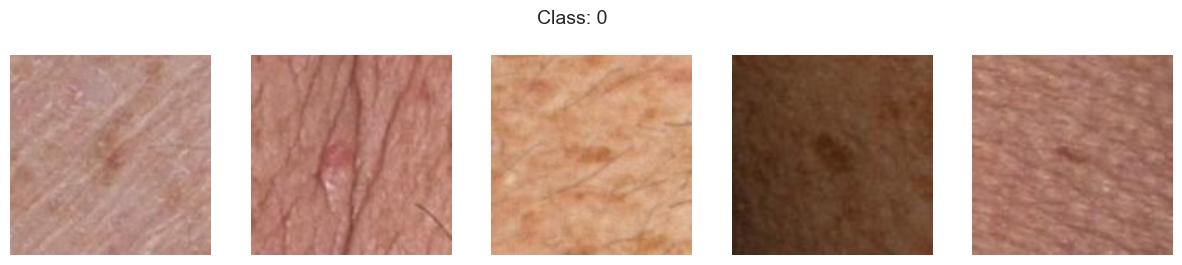

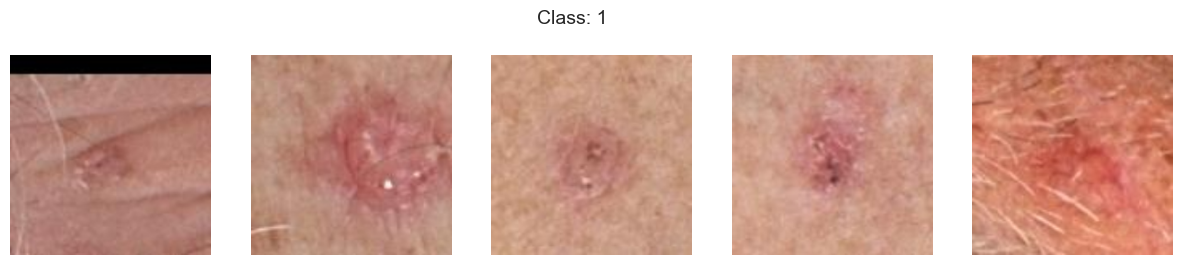

In [8]:
def show_samples_by_class(df, dataset, label_col="target", n=5):
    classes = df[label_col].unique()
    for cls in classes:
        subset_df = df[df[label_col] == cls].head(n)
        fig, axes = plt.subplots(1, len(subset_df), figsize=(15, 3))
        fig.suptitle(f"Class: {cls}", fontsize=14)

        for i, row in enumerate(subset_df.itertuples()):
            # Use the original index from the DataFrame `df`
            dataset_idx = row.Index  # This is the index in the original DataFrame

            # Get image from dataset
            image, _, _ = dataset[dataset_idx]
            # Convert from (C, H, W) to (H, W, C)
            image_np = image.permute(1, 2, 0).numpy()

            # Rescale image to [0, 1] range
            image_np = image_np.clip(0, 1)

            # Show image
            axes[i].imshow(image_np)
            axes[i].axis("off")

        plt.show()


# Show samples by class
show_samples_by_class(train_df, eda_dataset, label_col="target", n=5)

In [9]:
METADATA_COL2NAME = {
    "isic_id": "Unique Case Identifier",
    "target": "Binary Lesion Classification",
    "patient_id": "Unique Patient Identifier",
    "age_approx": "Approximate Age",
    "sex": "Sex",
    "anatom_site_general": "General Anatomical Location",
    "clin_size_long_diam_mm": "Clinical Size (Longest Diameter in mm)",
    "image_type": "Image Type",
    "tbp_tile_type": "TBP Tile Type",
    "tbp_lv_A": "Color Channel A (Inside)",
    "tbp_lv_Aext": "Color Channel A (Outside)",
    "tbp_lv_B": "Color Channel B (Inside)",
    "tbp_lv_Bext": "Color Channel B (Outside)",
    "tbp_lv_C": "Chroma (Inside)",
    "tbp_lv_Cext": "Chroma (Outside)",
    "tbp_lv_H": "Hue (Inside)",
    "tbp_lv_Hext": "Hue (Outside)",
    "tbp_lv_L": "Luminance (Inside)",
    "tbp_lv_Lext": "Luminance (Outside)",
    "tbp_lv_areaMM2": "Lesion Area (mm²)",
    "tbp_lv_area_perim_ratio": "Area-to-Perimeter Ratio",
    "tbp_lv_color_std_mean": "Mean Color Irregularity",
    "tbp_lv_deltaA": "Delta A",
    "tbp_lv_deltaB": "Delta B",
    "tbp_lv_deltaL": "Delta L",
    "tbp_lv_deltaLB": "Delta LB",
    "tbp_lv_deltaLBnorm": "Normalized Delta LB",
    "tbp_lv_eccentricity": "Eccentricity",
    "tbp_lv_location": "Detailed Location",
    "tbp_lv_location_simple": "Simplified Location",
    "tbp_lv_minorAxisMM": "Smallest Diameter (mm)",
    "tbp_lv_nevi_confidence": "Nevus Confidence Score",
    "tbp_lv_norm_border": "Normalized Border Irregularity",
    "tbp_lv_norm_color": "Normalized Color Variation",
    "tbp_lv_perimeterMM": "Lesion Perimeter (mm)",
    "tbp_lv_radial_color_std_max": "Radial Color Deviation",
    "tbp_lv_stdL": "Std. Dev. Luminance (Inside)",
    "tbp_lv_stdLExt": "Std. Dev. Luminance (Outside)",
    "tbp_lv_symm_2axis": "Symmetry (Second Axis)",
    "tbp_lv_symm_2axis_angle": "Symmetry Angle (Second Axis)",
    "tbp_lv_x": "X-Coordinate",
    "tbp_lv_y": "Y-Coordinate",
    "tbp_lv_z": "Z-Coordinate",
    "attribution": "Image Source",
    "copyright_license": "Copyright",
    "lesion_id": "Unique Lesion ID",
    "iddx_full": "Full Diagnosis",
    "iddx_1": "Diagnosis Level 1",
    "iddx_2": "Diagnosis Level 2",
    "iddx_3": "Diagnosis Level 3",
    "iddx_4": "Diagnosis Level 4",
    "iddx_5": "Diagnosis Level 5",
    "mel_mitotic_index": "Mitotic Index (Melanoma)",
    "mel_thick_mm": "Melanoma Thickness (mm)",
    "tbp_lv_dnn_lesion_confidence": "Lesion DNN Confidence",
}

In [10]:
# List shared columns between train and test
shared_columns = set(train_df.columns).intersection(set(test_df.columns))
shared_columns.add("target")  # Ensure 'target' is included
print("Shared Columns between train and test sets:")
print(sorted(shared_columns))

Shared Columns between train and test sets:
['age_approx', 'anatom_site_general', 'attribution', 'clin_size_long_diam_mm', 'copyright_license', 'image_type', 'isic_id', 'patient_id', 'sex', 'target', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'tbp_tile_type']


In [11]:
# Check train_df
print("Train DataFrame Info:")
print("Train Count:", len(train_df))

# Create a DataFrame to display information about shared columns
columns_info = []
for col in sorted(shared_columns):
    if col in METADATA_COL2NAME.keys():
        missing_count = train_df[col].isnull().sum()
        unique_count = train_df[col].nunique()
        columns_info.append(
            {
                "Feature": METADATA_COL2NAME[col] if col in METADATA_COL2NAME else col,
                "Column Name": col,
                "Missing Values": missing_count,
                "Unique Values": unique_count,
            }
        )

info_df = pd.DataFrame(columns_info)
display(info_df)

Train DataFrame Info:
Train Count: 400959


,Feature,Column Name,Missing Values,Unique Values
0,Approximate Age,age_approx,2796,16
1,General Anatomical Location,anatom_site_general,5756,5
2,Image Source,attribution,0,7
3,Clinical Size (Longest Diameter in mm),clin_size_long_diam_mm,0,1758
4,Copyright,copyright_license,0,3
5,Image Type,image_type,0,1
6,Unique Case Identifier,isic_id,0,400959
7,Unique Patient Identifier,patient_id,0,1042
8,Sex,sex,11513,2
9,Binary Lesion Classification,target,0,2


In [12]:
# Check test_df
print("Test DataFrame Info:")
print("Test Count:", len(test_df))

# Create a DataFrame to display information about shared columns
columns_info = []
for col in sorted(shared_columns):
    if col in METADATA_COL2NAME.keys() and col != "target":
        missing_count = test_df[col].isnull().sum()
        unique_count = test_df[col].nunique()
        columns_info.append(
            {
                "Feature": METADATA_COL2NAME[col] if col in METADATA_COL2NAME else col,
                "Column Name": col,
                "Missing Values": missing_count,
                "Unique Values": unique_count,
            }
        )

info_test_df = pd.DataFrame(columns_info)
display(info_test_df)

Test DataFrame Info:
Test Count: 100


,Feature,Column Name,Missing Values,Unique Values
0,Approximate Age,age_approx,2,11
1,General Anatomical Location,anatom_site_general,0,5
2,Image Source,attribution,0,7
3,Clinical Size (Longest Diameter in mm),clin_size_long_diam_mm,0,83
4,Copyright,copyright_license,0,3
5,Image Type,image_type,0,1
6,Unique Case Identifier,isic_id,0,100
7,Unique Patient Identifier,patient_id,0,92
8,Sex,sex,4,2
9,Color Channel A (Inside),tbp_lv_A,0,100


Given the analysis of the available data in the test set, the non relevant features for the model from a medical point of view are:

- `image_type` - Provides image information
- `patient_id` - Unique identifier for the patient
- `copyright_license` - Provides copyright information
- `attribution` - Image source attribution
- `anatom_site_general` - General anatomical site (many missing values and `tbp_lv_location` is better)
- `tbp_lv_location_simple` - Simplified anatomical location (`tbp_lv_location` is better)


In [13]:
# Delete rows matching an array of values
non_relevant_columns = [
    "image_type",
    "patient_id",
    "copyright_license",
    "attribution",
    "anatom_site_general",
    "tbp_lv_location_simple",
]
info_df = info_df[~info_df["Column Name"].isin(non_relevant_columns)]

In [14]:
info_df

,Feature,Column Name,Missing Values,Unique Values
0,Approximate Age,age_approx,2796,16
3,Clinical Size (Longest Diameter in mm),clin_size_long_diam_mm,0,1758
6,Unique Case Identifier,isic_id,0,400959
8,Sex,sex,11513,2
9,Binary Lesion Classification,target,0,2
10,Color Channel A (Inside),tbp_lv_A,0,385961
11,Color Channel A (Outside),tbp_lv_Aext,0,385212
12,Color Channel B (Inside),tbp_lv_B,0,389794
13,Color Channel B (Outside),tbp_lv_Bext,0,387670
14,Chroma (Inside),tbp_lv_C,0,390606


In [15]:
from kaggleisic.load_data import process_metadata

# Load metadata dataset
train_df, test_df = process_metadata()

/Users/eduardfer/Desktop/Big Data Analytics - UC3M/Machine Learning/KaggleISIC/src/kaggleisic/load_data.py:38: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(config.RAW_DATA_DIR / TRAIN_METADATA_CSV)


train_df shape: (400959, 55)
test_df shape:  (100, 44)
train_df shape after dropping columns: (400959, 39)
test_df shape after dropping columns:  (100, 38)
train_df shape after encoding: (400959, 39)
test_df shape after encoding:  (100, 38)
Train samples: 400959, Test samples: 100


In [16]:
print(f"Train missing values: {train_df.isnull().sum().sum()}")
print(f"Test missing values: {test_df.isnull().sum().sum()}")

Train missing values: 0
Test missing values: 0


In [17]:
output_path_train = urlparse(
    str(config.PROCESSED_DATA_DIR / "train-metadata-processed.csv")
).path
output_path_test = urlparse(
    str(config.PROCESSED_DATA_DIR / "test-metadata-processed.csv")
).path

# Save processed data

train_df.to_csv(output_path_train, index=False)
test_df.to_csv(output_path_test, index=False)

In [48]:
from kaggleisic.load_data import load_metadata_dataset

# Load processed metadata
train_meta_df, valid_meta_df, test_meta_df = load_metadata_dataset()

train_dataset shape: (320767, 39)
valid_dataset shape: (80192, 39)
test_dataset shape:  (100, 38)


In [19]:
len(train_meta_df)

320767

In [20]:
from kaggleisic.load_data import load_hdf5_dataset

# Load processed metadata
view_transform = T.Compose(
    [
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
train_df, valid_df, test_df = load_hdf5_dataset(transform=view_transform)

train_dataset shape: (320767, 39)
valid_dataset shape: (80192, 39)
test_dataset shape:  (100, 38)


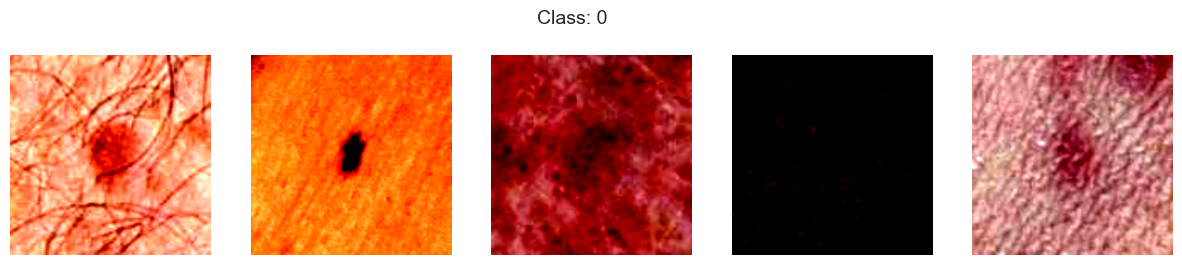

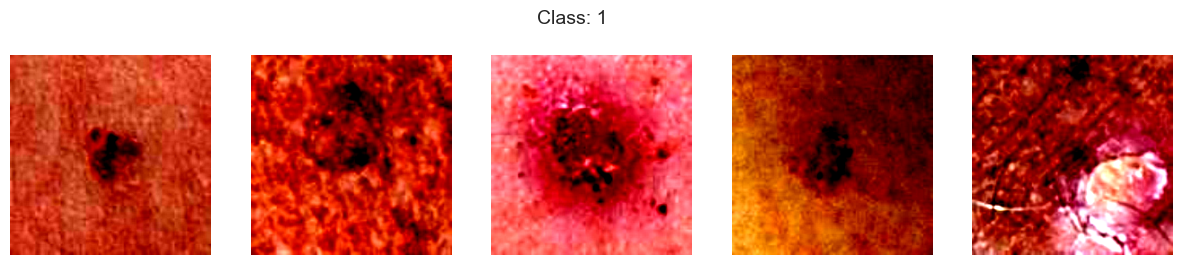

In [21]:
import matplotlib.pyplot as plt


def show_samples_by_class(df, dataset, label_col="target", n=5):
    classes = df[label_col].unique()
    for cls in classes:
        subset_df = df[df[label_col] == cls].head(n)
        fig, axes = plt.subplots(1, len(subset_df), figsize=(15, 3))
        fig.suptitle(f"Class: {cls}", fontsize=14)

        for i, row in enumerate(subset_df.itertuples()):
            # Use the original index from the DataFrame `df`
            dataset_idx = row.Index  # This is the index in the original DataFrame

            # Get image from dataset
            image, _, _ = dataset[dataset_idx]
            # Convert from (C, H, W) to (H, W, C)
            image_np = image.permute(1, 2, 0).numpy()

            # Rescale image to [0, 1] range
            image_np = image_np.clip(0, 1)

            # Show image
            axes[i].imshow(image_np)
            axes[i].axis("off")

        plt.show()


# Show samples by class
show_samples_by_class(train_meta_df, train_df, label_col="target", n=5)

In [22]:
from kaggleisic.load_data import load_multimodal_dataset

# Load processed metadata
view_transform = T.Compose(
    [
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
train_multi_df, valid_multi_df, test_multi_df = load_multimodal_dataset(
    transform=view_transform
)

train_dataset shape: (320767, 39)
valid_dataset shape: (80192, 39)
test_dataset shape:  (100, 38)


# Data Augmentation


In [4]:
full_train_df = pd.read_csv(config.PROCESSED_DATA_DIR / "train-metadata-processed.csv")

In [6]:
import importlib
import kaggleisic.data_augmentation

importlib.reload(kaggleisic.data_augmentation)

from kaggleisic.data_augmentation import generate_augmented_cancer_data

# Generate augmented data
augmented_train_df = generate_augmented_cancer_data(full_train_df)

100%|██████████| 343/343 [00:09<00:00, 35.51it/s]


✅ Augmented 1029 samples.


In [7]:
import h5py


# Count images in HDF5 file
def count_images_in_hdf5(hdf5_path):
    with h5py.File(hdf5_path, "r") as f:
        return len(f.keys())


print(
    "Number of images in train HDF5:",
    count_images_in_hdf5(
        urlparse(str(config.PROCESSED_DATA_DIR / "train-image-augmented.hdf5")).path
    ),
)

Number of images in train HDF5: 401988


In [8]:
# Save the augmented data to a CSV file
augmented_train_df.to_csv(
    urlparse(str(config.PROCESSED_DATA_DIR / "train-metadata-augmented.csv")).path,
    index=False,
)

In [9]:
import importlib
import kaggleisic.load_data

importlib.reload(kaggleisic.load_data)

from kaggleisic.load_data import load_metadata_dataset, load_hdf5_dataset

# Load metadata dataset (augmented)
train_meta_df, valid_meta_df, test_meta_df = load_metadata_dataset(is_augmented=True)

train_dataset shape: (321590, 39)
valid_dataset shape: (80398, 39)
test_dataset shape:  (100, 38)


In [10]:
# Load processed metadata
view_transform = T.Compose(
    [
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
train_hdf5_df, valid_hdf5_df, test_hdf5_df = load_hdf5_dataset(
    transform=None, is_augmented=True
)

train_dataset shape: (321590, 39)
valid_dataset shape: (80398, 39)
test_dataset shape:  (100, 38)


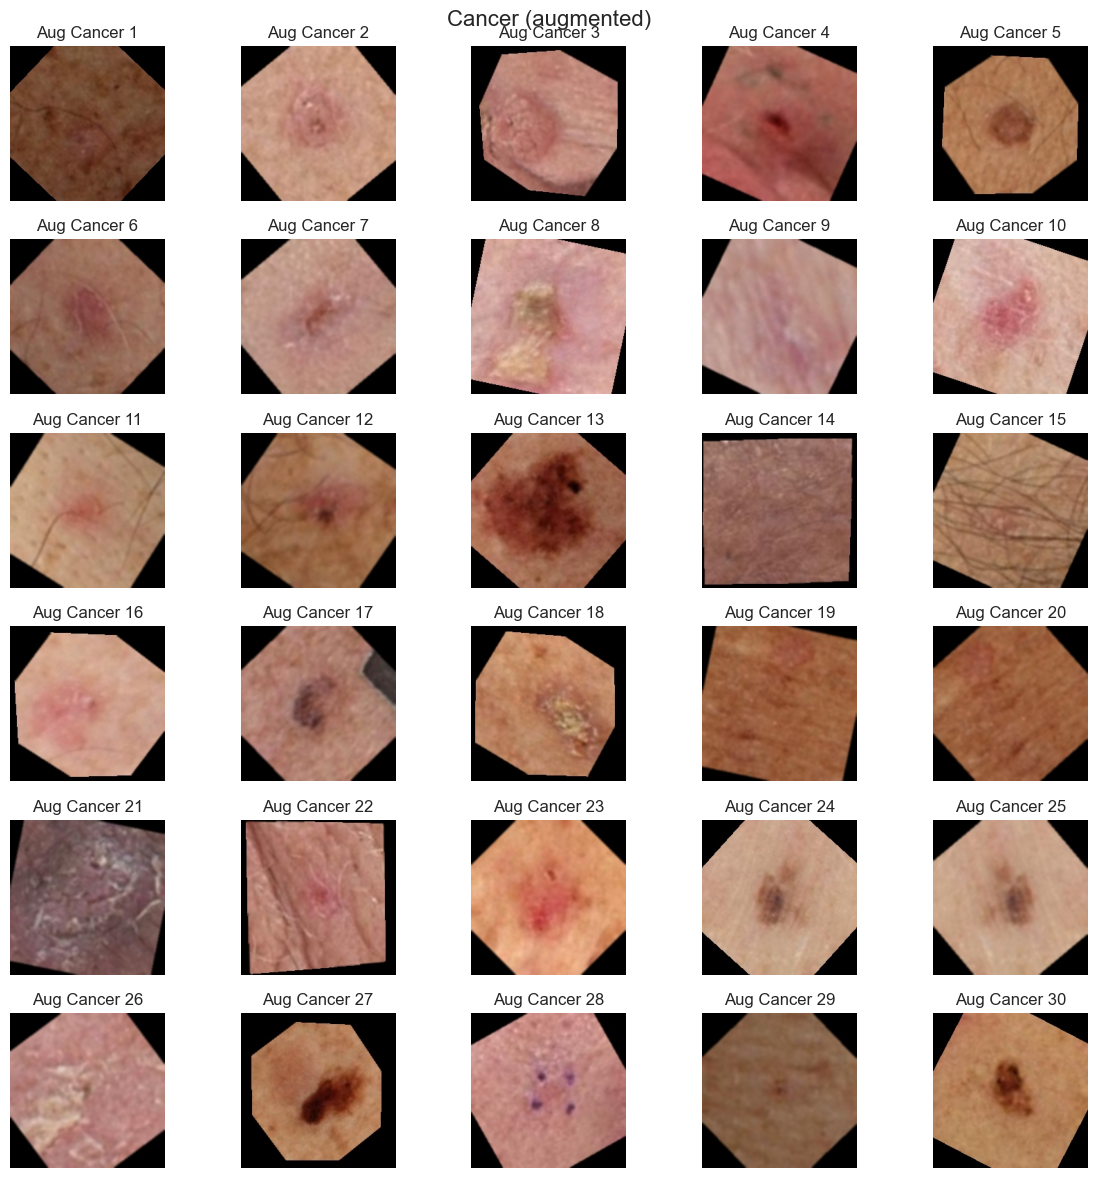

In [12]:
def show_samples_by_class_augmented(df, dataset, label_col="target", n=30):
    # Set up the figure with 6 rows and 5 columns (5 images per row)
    fig, axes = plt.subplots(
        6, 5, figsize=(12, 12)
    )  # 6 rows, 5 columns for better layout
    fig.suptitle("Cancer (augmented)", fontsize=16)

    # Filter the augmented cancer images (target == 1 & ISIC_AUG in isic_id)
    cancer_aug_df = df[
        (df[label_col] == 1) & df["isic_id"].str.startswith("ISIC_AUG")
    ].head(
        n
    )  # Take the first n rows

    for i, row in enumerate(cancer_aug_df.itertuples()):
        # Get image from the dataset
        image, _, _ = dataset[row.Index]

        # Convert image to NumPy and clip values between 0 and 1
        image_np = image.permute(1, 2, 0).numpy().clip(0, 1)

        # Get the row and column for the subplot
        row_idx = i // 5
        col_idx = i % 5

        # Plot the augmented image
        axes[row_idx, col_idx].imshow(image_np)
        axes[row_idx, col_idx].axis("off")
        axes[row_idx, col_idx].set_title(f"Aug Cancer {i + 1}")

    # Adjust layout for clarity
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust the title position
    plt.show()


# Show 30 augmented cancer samples (5 per row)
show_samples_by_class_augmented(train_meta_df, train_hdf5_df, label_col="target", n=30)